<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_ARVIND_MAURYA_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Q3.a Shuffle and break the data into 80% train and 20% test data**

In [2]:
#First, we import the required packages
import torch
import numpy as np
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

In [3]:
#Get the data from the csv file 
sample_data = pd.read_csv('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q3/Q3_data.csv?raw=true', index_col=False)
#print the data 
sample_data

,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23997,2,0,0,0,0,0,0,0,0,0,0,0,0,147,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23998,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,255,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#Separate the feature and target column
y = sample_data.pop('label')
X = sample_data
print(X)
print(y)

       feature0  feature1  feature2  ...  feature781  feature782  feature783
0             0         0         0  ...           0           0           0
1             0         0         0  ...           0           0           0
2             0         0         0  ...           0           0           0
3             0         0         0  ...           0           0           0
4             0         0         0  ...           0           0           0
...         ...       ...       ...  ...         ...         ...         ...
23995         0         0         0  ...           0           0           0
23996         0         0         0  ...           0           0           0
23997         0         0         0  ...           0           0           0
23998         0         0         0  ...           0           0           0
23999         0         0         0  ...           0           0           0

[24000 rows x 784 columns]
0        1
1        2
2        3
3        4
4   

In [5]:
#We will use the sklearn train_test_split which shuffle and break the data ins required ratio
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('Train data feature: ', X_train)
print('Train data Label: ', y_train)
print('Test data feature: ', X_test)
print('Test data Label: ',y_test)

Train data feature:         feature0  feature1  feature2  ...  feature781  feature782  feature783
10424         0         0         0  ...           0           0           0
12003         0         0         0  ...           0           0           0
12688         0         0         0  ...           0           0           0
14310         0         0         0  ...           0           0           0
1377          0         0         0  ...           0           0           0
...         ...       ...       ...  ...         ...         ...         ...
9224          0         0         0  ...           0           0           0
4747          0         0         0  ...           0           0           0
1565          0         0         0  ...           0           0           0
6895          0         0         0  ...           0           0           0
11280         0         0         0  ...           0           0           0

[19200 rows x 784 columns]
Train data Label:  10424   

In [6]:
print('Shape of Train data feature: ', X_train.shape , type(X_train))
print('Shape of Train data Label: ', y_train.shape , type(y_train))
print('Shape of Test data feature: ', X_test.shape)
print('Shape of Test data Label: ',y_test.shape)

Shape of Train data feature:  (19200, 784) <class 'pandas.core.frame.DataFrame'>
Shape of Train data Label:  (19200,) <class 'pandas.core.series.Series'>
Shape of Test data feature:  (4800, 784)
Shape of Test data Label:  (4800,)


In [7]:
#Get the unique lable from train and test feature and see if we dont have class imbalance in train and test data
unique, counts = np.unique(y_train, return_counts=True)
print('Train label:\n', np.asarray((unique, counts)).T)
unique, counts = np.unique(y_test, return_counts=True)
print('Test Label:\n',np.asarray((unique, counts)).T)

Train label:
 [[   1 4783]
 [   2 4780]
 [   3 4828]
 [   4 4809]]
Test Label:
 [[   1 1217]
 [   2 1220]
 [   3 1172]
 [   4 1191]]


In [8]:
#Creating some common function
#Creating Function for plotting the confusion Matrix
def plot_confusion_matrix(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
          
    #Lets Calculate the confusion Matrix
    from sklearn.metrics import confusion_matrix
    train_conf_matrix = confusion_matrix(p_y_train,p_y_train_predictions)
    test_conf_matrix = confusion_matrix(p_y_test,p_y_test_predictions)
    print( "Train confusion matrix: \n", train_conf_matrix)
    print("Test confusion matrix: \n", test_conf_matrix)
    
    #Plotting the confusion matrix for better interpretation
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax1, ax2 = axes
    sns.heatmap(train_conf_matrix, annot=True, fmt='g', ax=ax1)
    sns.heatmap(test_conf_matrix, annot=True, fmt='g', ax=ax2)
    ax1.set_title('Train Data')
    ax1.xaxis.set_ticklabels(['0', '1'])
    ax1.yaxis.set_ticklabels(['0', '1'])
    ax2.set_title('Test Data')
    ax2.xaxis.set_ticklabels(['0', '1'])
    ax2.yaxis.set_ticklabels(['0', '1'])
    fig.suptitle('Confusion Matrix')

def print_classification_report(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
    from sklearn.metrics import classification_report
    train_class_rpt = classification_report(p_y_train, p_y_train_predictions)
    print("======================================================")
    print("Train Classification Report:")
    print(train_class_rpt)
    print("======================================================")
    test_class_rpt = classification_report(p_y_test, p_y_test_predictions)
    print("Test Classification Report:")
    print(test_class_rpt)
    print("======================================================")

## **Q3.b Train a multi-layer perceptron (MLP)**

Q3.b : [C, R] Use the train partition to train a multi-layer perceptron (MLP) with an input layer, 3
hidden layers and an output layer. You are free to choose the number of neurons and their ac-
tivation functions in the hidden layers. Use a soft-max at the output layer and a cross-entropy
loss function to perform classifcation. Describe the MLP architecture you have used. Using the
MLP model, report the accuracy, precision, recall, F1 score for the train set and test set.

In [9]:
#import library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.metrics import  classification_report , confusion_matrix , accuracy_score

In [10]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [11]:
# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
#Looking at the shape , we have 784 input and 5 output.
print('Shape of Train data feature: ', X_train.shape , 'type: ', type(X_train))
print('Shape of Train data Label: ', y_train.shape , 'type: ', type(y_train))
print('Shape of Test data feature: ', X_test.shape , 'type: ', type(X_test))
print('Shape of Test data Label: ',y_test.shape , 'type: ', type(y_test))


Shape of Train data feature:  (19200, 784) type:  <class 'numpy.ndarray'>
Shape of Train data Label:  (19200,) type:  <class 'numpy.ndarray'>
Shape of Test data feature:  (4800, 784) type:  <class 'numpy.ndarray'>
Shape of Test data Label:  (4800,) type:  <class 'numpy.ndarray'>


In [13]:
feature_vector_length = 784
num_classes = 5

# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

(19200, 5)
(4800, 5)
Feature shape: (784,)


In [14]:
#Create NN layers now
model = keras.Sequential()
model.add(layers.Dense(512,input_shape=input_shape,activation='relu')) #i/p Layer + hidden layer1
model.add(layers.Dense(256,activation='relu')) # hidden layer2
model.add(layers.Dense(128,activation='relu')) # hidden layer2
model.add(layers.Dense(num_classes,activation='softmax')) #output layer



In [15]:
print(len(model.layers)) 

4


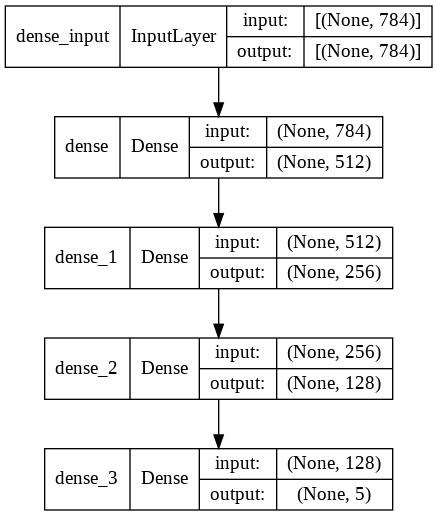

In [16]:
#Below is the MLP Architecture used.
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 566,789
Trainable params: 566,789
Non-trainable params: 0
_________________________________________________________________


In [18]:
#optimizer
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Fitting the model
model.fit(X_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
192/192 [==============================] - 3s 9ms/step - loss: 0.1629 - accuracy: 0.9468
Epoch 2/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0543 - accuracy: 0.9801
Epoch 3/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0279 - accuracy: 0.9903
Epoch 4/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0181 - accuracy: 0.9935
Epoch 5/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0122 - accuracy: 0.9965
Epoch 6/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0083 - accuracy: 0.9976
Epoch 7/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 8/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 9/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 10/50
192/192 [==============================] - 2s 9ms/step - loss: 0.0065 - accuracy: 0.9979

In [31]:
# #Get the package for ANN visualization tool
# pip install ann_visualizer
# pip install graphviz
# #This give the visual representation of the ANN network. However i have commented the code since it take some time to run
# from ann_visualizer.visualize import ann_viz;
# ann_viz(model, view=True,filename='network.gv', title="MLP Architecture")

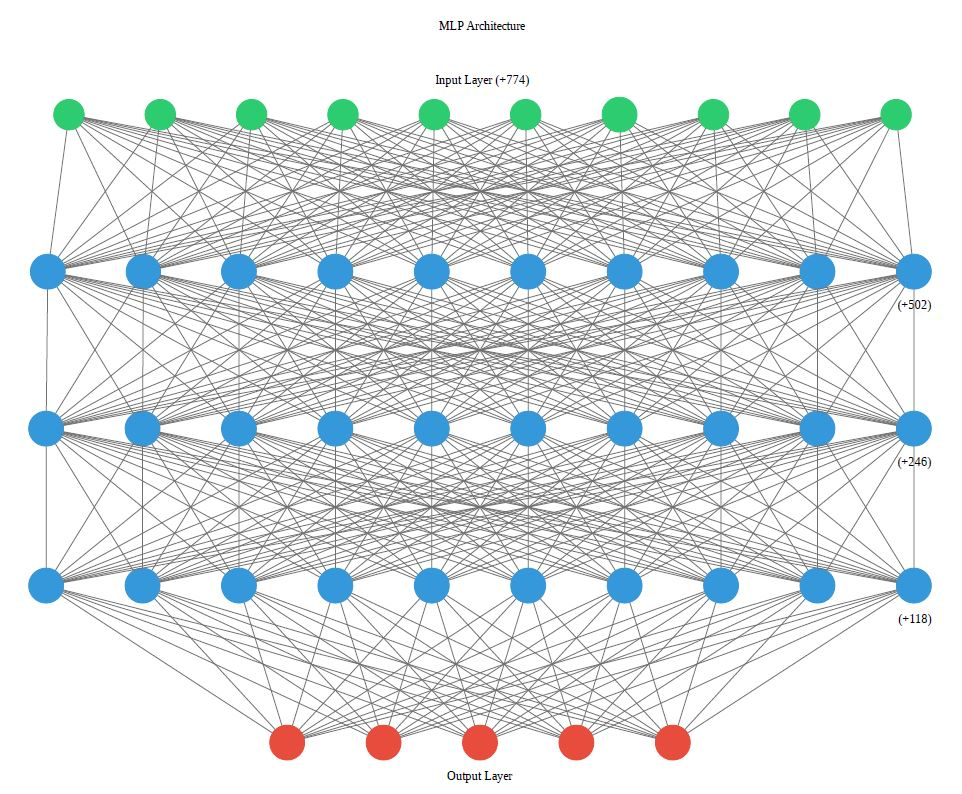

In [27]:
#predicted values
y_train_predict = model.predict(X_train)
y_train_predict=np.argmax(y_train_predict, axis=1)
y_train_predict

array([1, 4, 1, ..., 2, 4, 1])

In [28]:
y_test_predict = model.predict(X_test)
y_test_predict=np.argmax(y_test_predict, axis=1)
y_test_predict

array([3, 1, 4, ..., 1, 2, 3])

In [29]:
#convert reponse variable for train and test
y_test=np.argmax(y_test, axis=1)
y_train=np.argmax(y_train, axis=1)

MLP Statistics: 

Train Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4783
           2       1.00      1.00      1.00      4780
           3       1.00      1.00      1.00      4828
           4       1.00      1.00      1.00      4809

    accuracy                           1.00     19200
   macro avg       1.00      1.00      1.00     19200
weighted avg       1.00      1.00      1.00     19200

Test Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1217
           2       0.98      0.98      0.98      1220
           3       0.97      0.98      0.98      1172
           4       0.99      0.99      0.99      1191

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800

Train confusion matrix: 
 [[4783    0    0    0]
 [   0

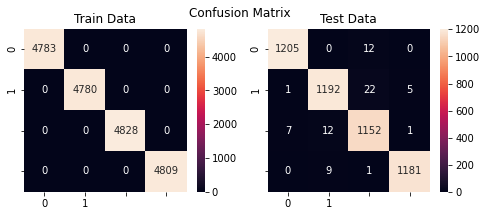

In [30]:
print('MLP Statistics: \n')
print_classification_report(y_train,y_train_predict,y_test,y_test_predict)
plot_confusion_matrix(y_train,y_train_predict,y_test,y_test_predict)

## **===========================================================**

## **Q3.C Train a CNN**

3 (c) [C, R] Now consider that each data point represented in vector form can be represented as a
p  p matrix for a suitable p. Using this transformed train data, build a convolution neural
network (CNN) with 3 convolution cum max-pool blocks (where max-pool follows a convolu-
tion operation) followed by a fully connected layer and an output layer. You are free to choose
the kernel size, stride and padding in each convolution operation. Also use a max-pool layer
of appropriate grid size in each layer. Use a soft-max at the output layer and a cross-entropy
loss function to perform classification. Describe the CNN architecture you have used. Using the
CNN model, report the accuracy, precision, recall, F1 score for the train set and test set.

In [ ]:
#Imort the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.metrics import  classification_report , confusion_matrix , accuracy_score

import matplotlib.pyplot as plt
import pandas as pd #the pandas library is useful for data processing 
import numpy as np
import random
import time

In [ ]:
#Get the data from the csv file 
sample_data_cnn = pd.read_csv('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q3/Q3_data.csv?raw=true', index_col=False)
#print the data 
sample_data_cnn

In [ ]:
#Separate the feature and target column
y_cnn = sample_data_cnn.pop('label')
X_cnn = sample_data_cnn
X_cnn = X_cnn.to_numpy()
y_cnn = y_cnn.to_numpy()
print(X_cnn)
print(y_cnn)

In [ ]:
#We will use the sklearn train_test_split which shuffle and break the data ins required ratio
from sklearn.model_selection import train_test_split
# split into train test sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn,y_cnn, test_size=0.2)

# Convert into greyscale
X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')

X_train_cnn = X_train_cnn/255
X_test_cnn = X_test_cnn/255

print('Train data feature: ', X_train_cnn)
print('Train data Label: ', y_train_cnn)
print('Test data feature: ', X_test_cnn)
print('Test data Label: ',y_test_cnn)


In [ ]:
print('Shape of Train data feature: ', X_train_cnn.shape)
print('Shape of Train data Label: ', y_train_cnn.shape)
print('Shape of Test data feature: ', X_test_cnn.shape)
print('Shape of Test data Label: ',y_test_cnn.shape)

In [ ]:
#Get the unique lable from train and test feature and see if we dont have class imbalance in train and test data
unique, counts = np.unique(y_train_cnn, return_counts=True)
print('Train label:\n', np.asarray((unique, counts)).T)
unique, counts = np.unique(y_test_cnn, return_counts=True)
print('Test Label:\n',np.asarray((unique, counts)).T)

In [ ]:
#rehaping the images into equal dim.
X_train_cnn = X_train_cnn.reshape(len(X_train_cnn),28,28,1)
X_test_cnn = X_test_cnn.reshape(len(X_test_cnn),28,28,1)

In [ ]:
print('Train Data Shape:', X_train_cnn.shape , 'Test Data shape:', X_test_cnn.shape )

In [ ]:
from keras.utils.np_utils import to_categorical

print('Y Train Data Shape:', y_train_cnn.shape , 'Y Test Data shape:', y_test_cnn.shape )
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)
print('After converting Y dataset to Categorical ')
print('Y Train Data Shape:', y_train_cnn.shape , 'Y Test Data shape:', y_test_cnn.shape )
y_train_cnn[0]

In [ ]:
#create model
model_cnn = keras.Sequential()
#add model layers
model_cnn.add(layers.Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_cnn.add(layers.MaxPooling2D(pool_size=2))
model_cnn.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=2))
model_cnn.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
model_cnn.add(layers.MaxPooling2D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(5, activation='softmax'))

In [ ]:
#Below is the CNN Architecture used.
keras.utils.plot_model(model_cnn, show_shapes=True, show_layer_names=True)

In [ ]:
model_cnn.summary()

In [ ]:
#compile model using accuracy to measure model performance
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#train the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=3)

In [ ]:
#predict first 4 images in the test set
model_cnn.predict(X_test_cnn[:4])

The above give the probability for prediction for classes. We should take the value which has higher probability 

In [ ]:
#actual results for first 4 images in test set
y_test_cnn[:4]

In [ ]:
score = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

In [ ]:
#predicted values for train
y_train_predict_cnn = model_cnn.predict(X_train_cnn)
y_train_predict_cnn=np.argmax(y_train_predict_cnn, axis=1)
y_train_predict_cnn

In [ ]:
#predicted values for test
y_test_predict_cnn = model_cnn.predict(X_test_cnn)
y_test_predict_cnn=np.argmax(y_test_predict_cnn, axis=1)
y_test_predict_cnn

In [ ]:
#convert reponse variable for train and test
y_test_cnn=np.argmax(y_test_cnn, axis=1)
y_train_cnn=np.argmax(y_train_cnn, axis=1)

In [ ]:
print('CNN Statistics: \n')
print_classification_report(y_train_cnn,y_train_predict_cnn,y_test_cnn,y_test_predict_cnn)
plot_confusion_matrix(y_train_cnn,y_train_predict_cnn,y_test_cnn,y_test_predict_cnn)